# Step 1: Importing the modules

In [0]:
# TensorFlow is an open source machine learning library
!pip install tensorflow==2.0
import tensorflow as tf
# NumPy is a math library
import numpy as np
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# math is Python's math library
import math

In [0]:
from keras.models import Sequential
from keras.layers import Dense 
from tensorflow.keras import layers
import numpy

In [0]:
seed = 9
numpy.random.seed(seed)

In [0]:
from pandas import read_csv

In [0]:

filename = '/content/fireData.csv'
dataframe = read_csv(filename)

In [0]:
array = dataframe.values

In [213]:
X = array[:,0:4]
Y = array[:,4]
print(X)
print(Y)

[[4.050e-01 1.000e-03 4.389e-01 2.312e-01]
 [4.070e-01 1.000e-03 4.429e-01 2.311e-01]
 [4.110e-01 1.000e-03 4.431e-01 2.312e-01]
 ...
 [1.957e+00 6.740e-01 2.510e-01 3.997e-01]
 [1.832e+00 4.900e-01 2.533e-01 3.991e-01]
 [1.917e+00 6.110e-01 2.700e-01 3.974e-01]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.

In [214]:
dataframe.head()

,CO2,tVOC,Humidity,Temp,Fire
0,0.405,0.001,0.4389,0.2312,0
1,0.407,0.001,0.4429,0.2311,0
2,0.411,0.001,0.4431,0.2312,0
3,0.416,0.002,0.4430,0.2311,0
4,0.424,0.003,0.4433,0.2311,0


In [0]:
import tensorflow as tf

In [216]:
model = tf.keras.Sequential()
# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
model.add(layers.Dense(16, activation='relu',kernel_initializer='uniform',input_shape=(4,)))
# The new second layer may help the network learn more complex representations
model.add(layers.Dense(16, activation='relu',kernel_initializer='uniform'))
# Final layer is a single neuron, since we want to output a single value
model.add(layers.Dense(1,kernel_initializer='uniform',activation='sigmoid'))
# Compile the model using a standard optimizer and loss function for regression
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Show a summary of the model
model.summary()


Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_135 (Dense)            (None, 16)                80        
_________________________________________________________________
dense_136 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_137 (Dense)            (None, 1)                 17        
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [217]:
history = model.fit(X,Y,epochs=30,batch_size=15)

Train on 799 samples
Epoch 1/30
799/799 [==============================] - 0s 480us/sample - loss: 0.6827 - accuracy: 0.7434
Epoch 2/30
799/799 [==============================] - 0s 89us/sample - loss: 0.5885 - accuracy: 0.9887
Epoch 3/30
799/799 [==============================] - 0s 84us/sample - loss: 0.4002 - accuracy: 0.9987
Epoch 4/30
799/799 [==============================] - 0s 82us/sample - loss: 0.2296 - accuracy: 0.9987
Epoch 5/30
799/799 [==============================] - 0s 87us/sample - loss: 0.1155 - accuracy: 0.9975
Epoch 6/30
799/799 [==============================] - 0s 83us/sample - loss: 0.0608 - accuracy: 0.9975
Epoch 7/30
799/799 [==============================] - 0s 84us/sample - loss: 0.0364 - accuracy: 0.9987
Epoch 8/30
799/799 [==============================] - 0s 81us/sample - loss: 0.0242 - accuracy: 0.9987
Epoch 9/30
799/799 [==============================] - 0s 89us/sample - loss: 0.0174 - accuracy: 0.9987
Epoch 10/30
799/799 [==============================

In [223]:
score=model.evaluate(X,Y)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

799/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
filename1 = '/content/validateFire.csv'
dataframe1 = read_csv(filename)

In [0]:
array1 = dataframe1.values

In [228]:
X1 = array1[:,0:4]
Y1 = array1[:,4]
print(X1)
print(Y1)

[[2.770e+00 2.370e+00 1.407e-01 4.828e-01]
 [3.373e+00 3.658e+00 1.405e-01 4.835e-01]
 [2.158e+00 1.048e+00 1.402e-01 4.841e-01]
 [1.837e+00 4.980e-01 1.399e-01 4.845e-01]
 [1.753e+00 3.940e-01 1.356e-01 4.847e-01]
 [1.321e+00 1.400e-01 1.309e-01 4.849e-01]
 [9.950e-01 9.000e-02 1.277e-01 4.849e-01]
 [6.790e-01 4.200e-02 1.235e-01 4.847e-01]
 [2.493e+00 1.768e+00 1.198e-01 4.842e-01]
 [2.084e+00 8.900e-01 1.179e-01 4.840e-01]
 [2.189e+00 1.115e+00 1.164e-01 4.837e-01]
 [2.428e+00 1.633e+00 1.147e-01 4.838e-01]
 [2.092e+00 9.090e-01 1.142e-01 4.838e-01]
 [2.574e+00 1.935e+00 1.136e-01 4.838e-01]
 [2.054e+00 8.330e-01 1.133e-01 4.838e-01]
 [2.402e+00 1.577e+00 1.125e-01 4.838e-01]
 [1.815e+00 4.690e-01 1.126e-01 4.836e-01]
 [2.158e+00 1.048e+00 1.113e-01 4.832e-01]
 [2.318e+00 1.399e+00 1.108e-01 4.830e-01]
 [5.480e-01 2.200e-02 4.425e-01 2.312e-01]
 [5.480e-01 2.200e-02 4.425e-01 2.311e-01]
 [5.480e-01 2.200e-02 4.425e-01 2.312e-01]
 [5.660e-01 2.500e-02 4.428e-01 2.311e-01]
 [5.660e-01

In [229]:
dataframe.head()


,CO2,tVOC,Humidity,Temp,Fire
0,2.770,2.370,0.1407,0.4828,1
1,3.373,3.658,0.1405,0.4835,1
2,2.158,1.048,0.1402,0.4841,1
3,1.837,0.498,0.1399,0.4845,1
4,1.753,0.394,0.1356,0.4847,1


In [234]:
loss = model.evaluate(X1,Y1)
predictions = model.predict(X1)


47/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

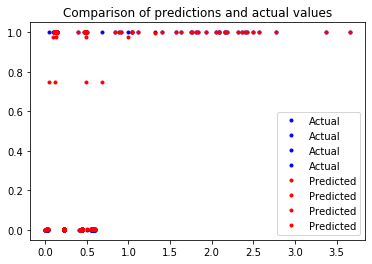

In [236]:

plt.title('Comparison of predictions and actual values')
plt.plot(X1, Y1, 'b.', label='Actual')
plt.plot(X1, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [240]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("fire_model.tflite", "wb").write(tflite_model)

# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

# Save the model to disk
open("fire_model_quantized.tflite", "wb").write(tflite_model)

3064

In [0]:
# Instantiate an interpreter for each model
fire_model = tf.lite.Interpreter('fire_model.tflite')
fire_model_quantized = tf.lite.Interpreter('fire_model_quantized.tflite')

# Allocate memory for each model
fire_model.allocate_tensors()
fire_model_quantized.allocate_tensors()

# Get the input and output tensors so we can feed in values and get the results
fire_model_input = fire_model.tensor(fire_model.get_input_details()[0]["index"])
fire_model_output = fire_model.tensor(fire_model.get_output_details()[0]["index"])
fire_model_quantized_input = fire_model_quantized.tensor(fire_model_quantized.get_input_details()[0]["index"])
fire_model_quantized_output = fire_model_quantized.tensor(fire_model_quantized.get_output_details()[0]["index"])

# Create arrays to store the results
fire_model_predictions = np.empty(X1.size)
fire_model_quantized_predictions = np.empty(X1.size)

# Run each model's interpreter for each value and store the results in arrays
for i in range(X1.size):
  fire_model_input().fill(X1[i])
  fire_model.invoke()
  fire_model_predictions[i] = fire_model_output()[0]

  fire_model_quantized_input().fill(X1[i])
  fire_model_quantized.invoke()
  fire_model_quantized_predictions[i] = fire_model_quantized_output()[0]

# See how they line up with the data
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(X1, Y1, 'bo', label='Actual')
plt.plot(X1, predictions, 'ro', label='Original predictions')
plt.plot(X1, fire_model_predictions, 'bx', label='Lite predictions')
plt.plot(X1, fire_model_quantized_predictions, 'gx', label='Lite quantized predictions')
plt.legend()
plt.show()

In [242]:
import os
basic_model_size = os.path.getsize("fire_model.tflite")
print("Basic model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("fire_model_quantized.tflite")
print("Quantized model is %d bytes" % quantized_model_size)
difference = basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)

Basic model is 3096 bytes
Quantized model is 3064 bytes
Difference is 32 bytes


In [243]:
# Install xxd if it is not available
!apt-get -qq install xxd
# Save the file as a C source file
!xxd -i fire_model_quantized.tflite > fire_model_quantized.cc
# Print the source file
!cat fire_model_quantized.cc

Selecting previously unselected package xxd.
(Reading database ... 145674 files and directories currently installed.)
Preparing to unpack .../xxd_2%3a8.0.1453-1ubuntu1.1_amd64.deb ...
Unpacking xxd (2:8.0.1453-1ubuntu1.1) ...
Setting up xxd (2:8.0.1453-1ubuntu1.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
unsigned char fire_model_quantized_tflite[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x12, 0x00,
  0x1c, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x14, 0x00,
  0x00, 0x00, 0x18, 0x00, 0x12, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0xa4, 0x0b, 0x00, 0x00, 0xc8, 0x06, 0x00, 0x00, 0xb0, 0x06, 0x00, 0x00,
  0x34, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x04, 0xf5, 0xff, 0xff, 0x08, 0x00, 0x00, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x13, 0x00, 0x00, 0x00, 0x6d, 0x69, 0x6e, 0x5f,
  0x72, 0x75, 0x6e, 0x74, 0x69, 0x6d, 0x65, 0x5f, 0x76, 0x65, 0x72, 0x73,
  0x69, 0x6f, 0x6e, 0x00, 0x0d, 0x00,